### IMPORTACIÓN DE PAQUETES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

### DATA

In [ ]:
data = pd.read_csv("/content/Indice.csv") 
df = data.copy()
df.date = pd.to_datetime(df.date, dayfirst = True)
df.set_index("date", inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')

In [ ]:
df['market_value']=df.ftse

In [5]:
del df['spx']
del df['dax']
del df['ftse']
del df['nikkei']
size = int(len(df)*0.8)
df, df_test = df.iloc[:size], df.iloc[size:]

### FUNCIONES DE AUTOCORRELACIÓN

#### ACF

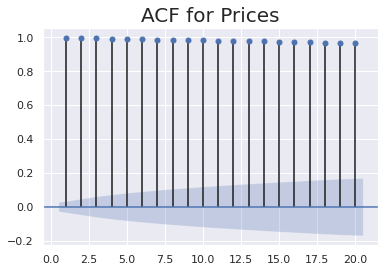

In [6]:
sgt.plot_acf(df.market_value, zero = False, lags = 20)
plt.title("ACF for Prices", size=20)
plt.show()

#### PACF

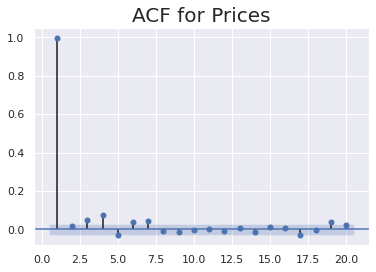

In [7]:
sgt.plot_pacf(df.market_value, lags = 20, alpha = 0.05, zero = False, method = ('ols'))
plt.title("ACF for Prices", size=20)
plt.show()

### RETORNOS

In [8]:
df['returns'] = df.market_value.pct_change(1)*100

In [9]:
df.head()

,market_value,returns
date,,
1994-01-07,3445.98,NaN
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166


### FUNCIONES DE AUTOCORRELCIÓN

####  ACF de RETORNOS

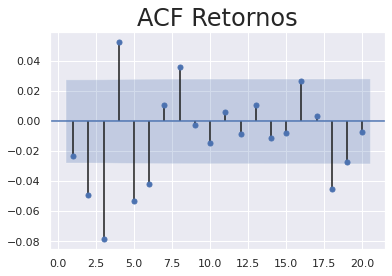

In [10]:
sgt.plot_acf(df.returns[1:], zero = False, lags = 20)
plt.title("ACF Retornos", size=24)
plt.show()

#### PACF de RETORNOS

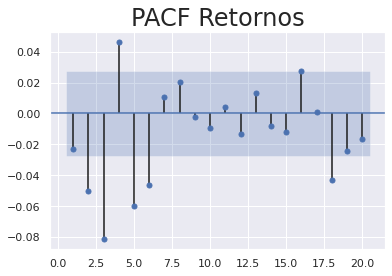

In [11]:
sgt.plot_pacf(df.returns[1:], lags = 20, zero = False, method = ('ols'))
plt.title("PACF Retornos", size=24)
plt.show()

### MEDIA MOVIL MA(q)

#### Test LLR  (PRUEBA DE RAZÓN DE VEROSIMILITUD)

In [12]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [13]:
import warnings
warnings.filterwarnings("ignore")

#### MA(1) de RETORNOS

In [14]:
model_ma_1 = ARMA(df.market_value, order=(0,1))
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(0, 1)   Log Likelihood              -38629.000
Method:                       css-mle   S.D. of innovations            530.756
Date:                Fri, 04 Jun 2021   AIC                          77264.000
Time:                        19:26:47   BIC                          77283.564
Sample:                    01-07-1994   HQIC                         77270.856
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6652     14.660    347.192      0.000    5060.933    5118.397
ma.L1.market_value     0.9573      0.003    335.561      0.000       0.952       0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0446           +0.0000j            1.0446            0.5000
-----------------------------------------------------------------------------
"""

In [15]:
ma_1 = ARMA(df.returns[1:], order=(0,1))
ajuste_ma_1 = ma_1.fit()
ajuste_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Fri, 04 Jun 2021   AIC                          15865.190
Time:                        19:28:52   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.086      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8549           +0.0000j           38.8549            0.0000
-----------------------------------------------------------------------------
"""

#### MODELOS MA DE ORDEN SUPERIOR (Higher-Lag) 

In [17]:
ma_2 = ARMA(df.returns[1:], order=(0,2))
ajuste_ma_2 = ma_2.fit()
print(ajuste_ma_2.summary())
print("\nLLR test p-value = " + str(LLR_test(ajuste_ma_1, ajuste_ma_2)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.864
Method:                       css-mle   S.D. of innovations              1.173
Date:                Fri, 04 Jun 2021   AIC                          15853.728
Time:                        19:34:47   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.239      0.215      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.297      0.022      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     

In [18]:
ma_3 = ARMA(df.returns[1:], order=(0,3))
ajuste_ma_3 = ma_3.fit()
print(ajuste_ma_3.summary())
print("\nLLR test p-value = " + str(LLR_test(ajuste_ma_2, ajuste_ma_3)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -7904.317
Method:                       css-mle   S.D. of innovations              1.168
Date:                Fri, 04 Jun 2021   AIC                          15818.634
Time:                        19:36:26   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0203      0.014     -1.423      0.155      -0.048       0.008
ma.L2.returns    -0.0556      0.013     

In [19]:
ma_4 = ARMA(df.returns[1:], order=[0,4])
ajuste_ma_4 = ma_4.fit()
print(ajuste_ma_4.summary())
print("\nLLR test p-value = " + str(LLR_test(ajuste_ma_3, ajuste_ma_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 4)   Log Likelihood               -7898.773
Method:                       css-mle   S.D. of innovations              1.167
Date:                Fri, 04 Jun 2021   AIC                          15809.547
Time:                        19:39:01   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.305      0.192      -0.009       0.047
ma.L1.returns    -0.0203      0.014     -1.443      0.149      -0.048       0.007
ma.L2.returns    -0.0551      0.014     

In [20]:
ma_5 = ARMA(df.returns[1:], order=[0,5])
ajuste_ma_5 = ma_5.fit()
print(ajuste_ma_5.summary())
print("\nLLR test p-value = " + str(LLR_test(ajuste_ma_4, ajuste_ma_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 5)   Log Likelihood               -7892.823
Method:                       css-mle   S.D. of innovations              1.166
Date:                Fri, 04 Jun 2021   AIC                          15799.645
Time:                        19:39:43   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0262      0.014     -1.851      0.064      -0.054       0.002
ma.L2.returns    -0.0497      0.014     

In [21]:
ma_6 = ARMA(df.returns[1:], order=[0,6])
ajuste_ma_6 = ma_6.fit()
print(ajuste_ma_6.summary())
print("\nLLR test p-value = " + str(LLR_test(ajuste_ma_5, ajuste_ma_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -7889.221
Method:                       css-mle   S.D. of innovations              1.165
Date:                Fri, 04 Jun 2021   AIC                          15794.442
Time:                        19:40:14   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.430      0.153      -0.007       0.045
ma.L1.returns    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.returns    -0.0486      0.014     

In [22]:
ma_7 = ARMA(df.returns[1:], order=[0,7])
ajuste_ma_7 = ma_7.fit()
print(ajuste_ma_7.summary())
print("\nLLR test p-value = " + str(LLR_test(ajuste_ma_6, ajuste_ma_7)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 7)   Log Likelihood               -7889.046
Method:                       css-mle   S.D. of innovations              1.165
Date:                Fri, 04 Jun 2021   AIC                          15796.091
Time:                        19:40:42   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.418      0.156      -0.007       0.045
ma.L1.returns    -0.0247      0.014     -1.739      0.082      -0.052       0.003
ma.L2.returns    -0.0488      0.014     

In [23]:
ma_8 = ARMA(df.returns[1:], order=[0,8])
ajuste_ma_8 = ma_8.fit()
print(ajuste_ma_8.summary())
print("\nLLR test p-value = " + str(LLR_test(ajuste_ma_7, ajuste_ma_8)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -7885.603
Method:                       css-mle   S.D. of innovations              1.164
Date:                Fri, 04 Jun 2021   AIC                          15791.205
Time:                        19:41:22   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.364      0.173      -0.008       0.046
ma.L1.returns    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.returns    -0.0495      0.014     

In [24]:
LLR_test(ajuste_ma_6, ajuste_ma_8, DF = 2)

0.027

### ANALISIS DE LOS RESIDUOS 

In [25]:
df['res_ret_ma_8'] = ajuste_ma_8.resid[1:]
df.head()


,market_value,returns,res_ret_ma_8
date,,,
1994-01-07,3445.98,NaN,NaN
1994-01-10,3440.58,-0.156704,NaN
1994-01-11,3413.77,-0.779229,-0.802111
1994-01-12,3372.02,-1.222988,-1.269464
1994-01-13,3360.01,-0.356166,-0.464780


In [26]:
print("The mean of the residuals is " + str(round(df.res_ret_ma_8.mean(),3)) + "\nThe variance of the residuals is " + str(round(df.res_ret_ma_8.var(),3)))

The mean of the residuals is -0.0
The variance of the residuals is 1.356


In [27]:
round(sqrt(df.res_ret_ma_8.var()),3)

1.164

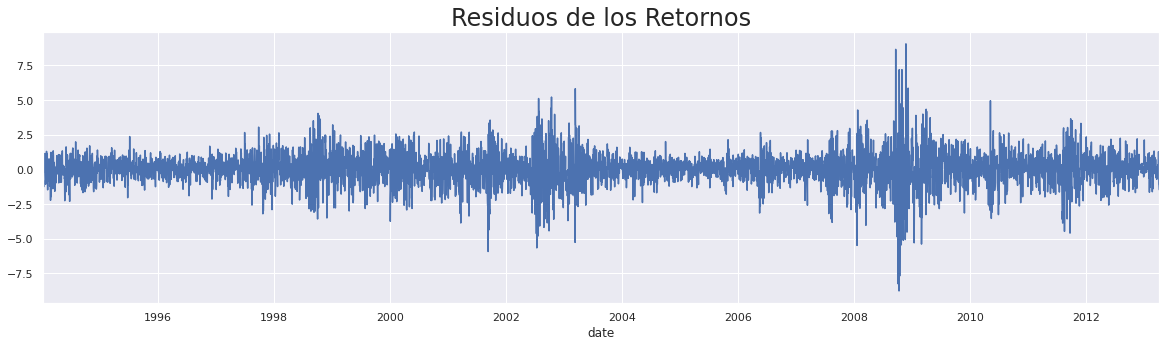

In [28]:
df.res_ret_ma_8[1:].plot(figsize = (20,5))
plt.title("Residuos de los Retornos", size = 24)
plt.show()

#### ESTACIONARIEDAD

In [29]:
sts.adfuller(df.res_ret_ma_8[2:])

(-70.83581502434359,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '10%': -2.567076687880585,
  '5%': -2.8621161549128313},
 15684.052185059796)

#### FUNCIONES DE AUTOCORRELACIÓN

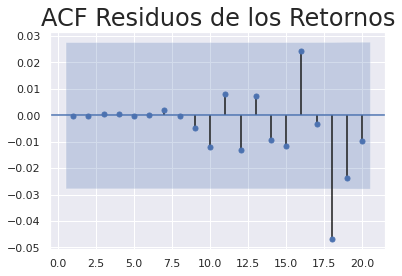

In [30]:
sgt.plot_acf(df.res_ret_ma_8[2:], zero = False, lags = 20)
plt.title("ACF Residuos de los Retornos",size=24)
plt.show()

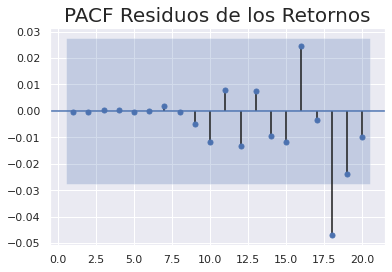

In [31]:
sgt.plot_pacf(df.res_ret_ma_8[2:], lags = 20, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF Residuos de los Retornos", size = 20)
plt.show()